## *Exploratory Data Analysis - EDA*

In [ ]:
%run C:\Users\Omar\Desktop\Omar_Files\Python_Analysis\Siteck\NoteBooks\2.Data_Cleaning.ipynb

---

### *Descrirptive statistics*

#### *A. categorical & numerical_features:*

In [2]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [3]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 7 numerical features : ['date', 'company', 'quantity', 'price_per_case', 'total_sales', 'month', 'day']
we have 12 categorical features : ['order_id', 'company_region', 'product_id', 'product', 'customer_id', 'product_category01', 'product_category02', 'product_category03', 'unit', 'year', 'month_name', 'day_name']


---

#### *B. Basic data statistics:*


* *Numerical data statistics :*

In [4]:
pd.DataFrame(df[["quantity","price_per_case","total_sales"]].describe())

,quantity,price_per_case,total_sales
count,11338.000000,11338.000000,11338.000000
mean,313.280737,42.528841,13305.313018
std,509.306463,4.656775,21637.964702
min,10.000000,35.000000,360.000000
25%,114.000000,38.000000,4802.000000
50%,227.000000,42.000000,9586.500000
75%,344.000000,47.000000,14800.000000
max,10407.000000,50.000000,364245.000000


* *Categorical data statistics :*

In [5]:
pd.DataFrame(df[["company_region","product","product_category01","product_category02","product_category03","unit"]]).describe()

,company_region,product,product_category01,product_category02,product_category03,unit
count,11338,11338,11338,11338,11338,11338
unique,2,7,3,2,3,2
top,South,AVO32CNV2,32,CNV,2,case
freq,7340,3687,4546,11181,5817,11092


---

#### *C. EDA - Data Visualization:*

* *Numerical features Visualization :*

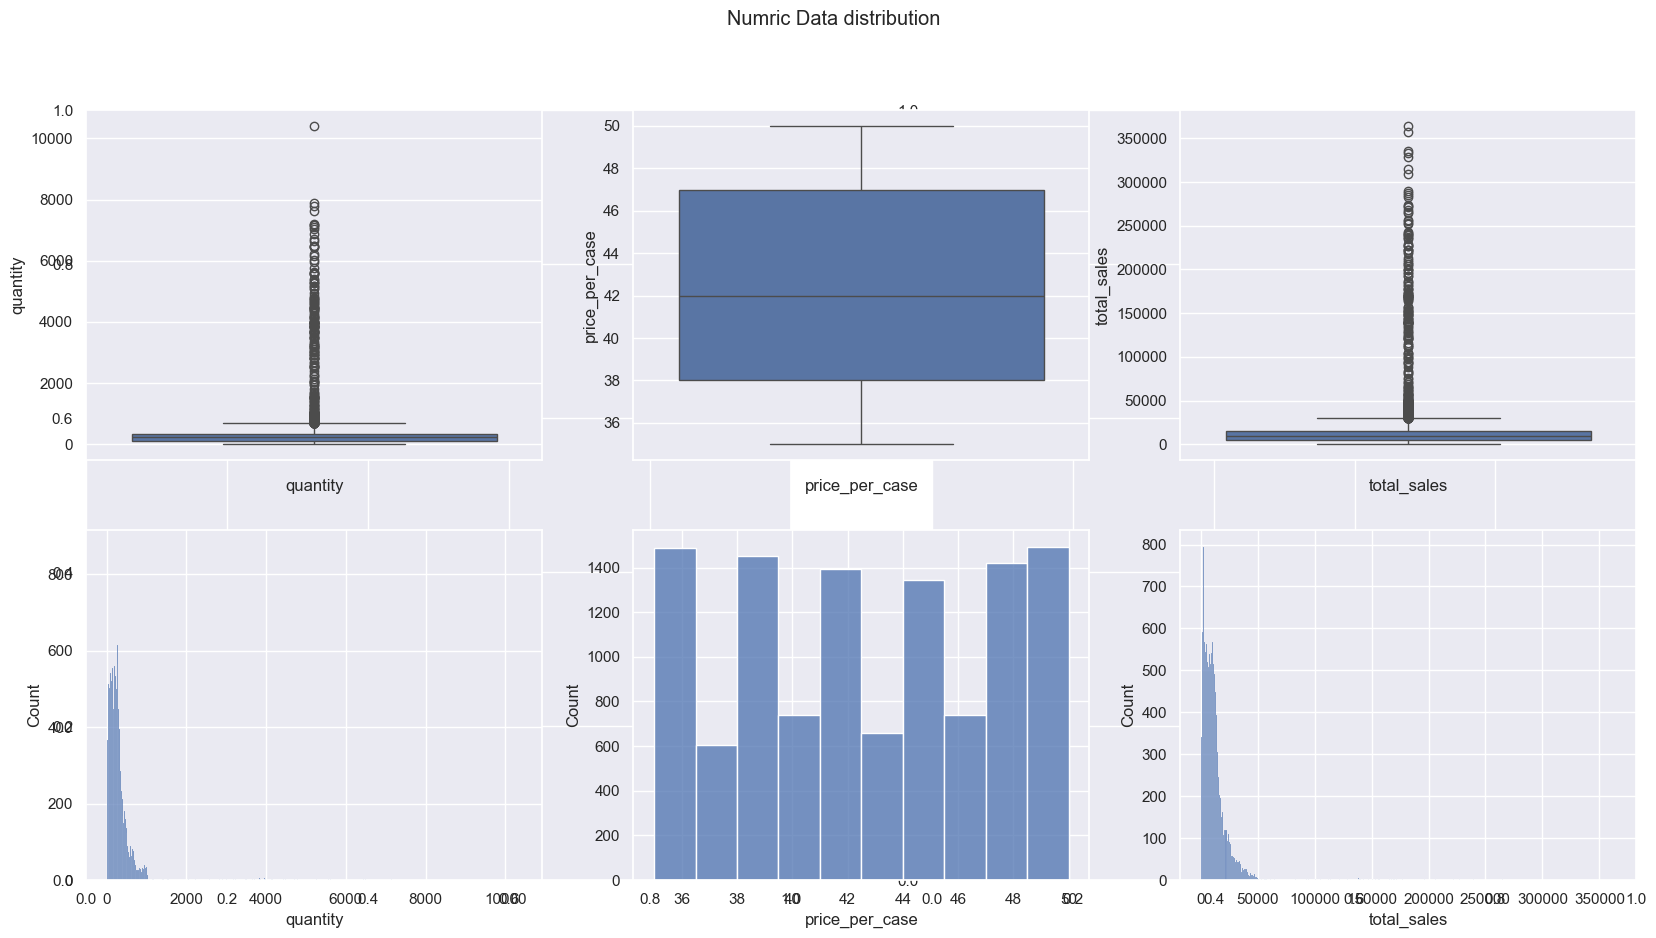

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(231)
sns.boxplot(df["quantity"])
plt.xlabel("quantity");

plt.subplot(232)
sns.boxplot(df["price_per_case"])
plt.xlabel("price_per_case");

plt.subplot(233)
sns.boxplot(df["total_sales"])
plt.xlabel("total_sales");


plt.subplot(234)
sns.histplot(df["quantity"])
plt.xlabel("quantity");

plt.subplot(235)
sns.histplot(df["price_per_case"],bins=10)
plt.xlabel("price_per_case");

plt.subplot(236)
sns.histplot(df["total_sales"])
plt.xlabel("total_sales");

* *Categorical features Visualization :*

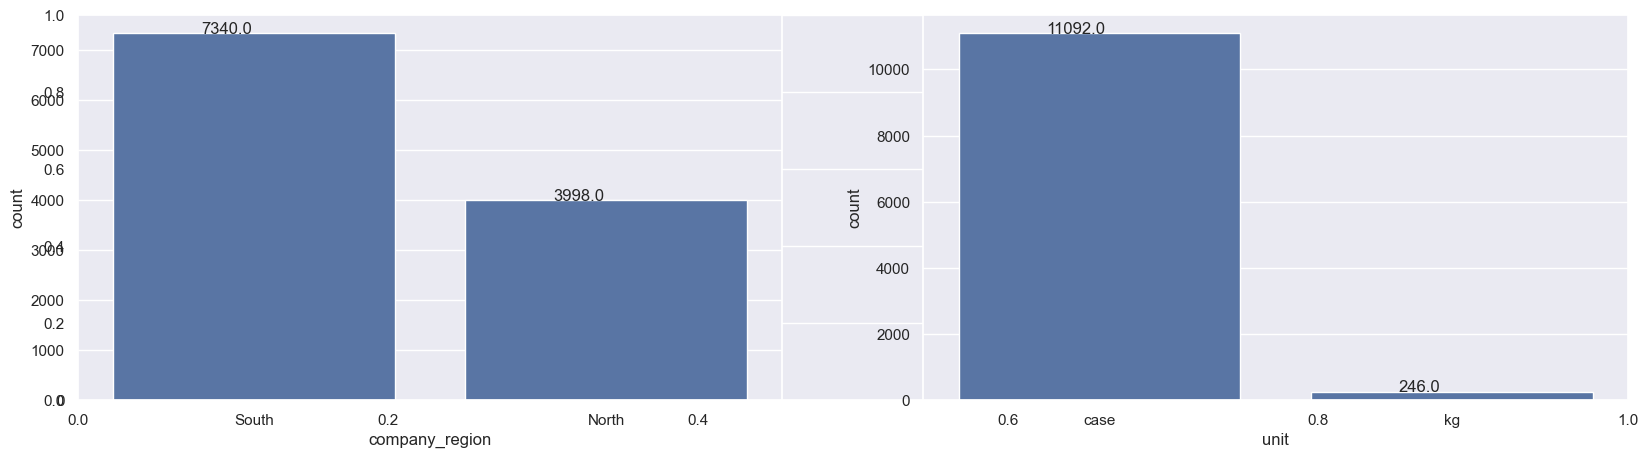

In [7]:
plt.subplots(figsize=(20,5))

plt.subplot(121)
ax=sns.countplot(data=df,x="company_region")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
         
plt.subplot(122)
ax=sns.countplot(data=df,x="unit")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

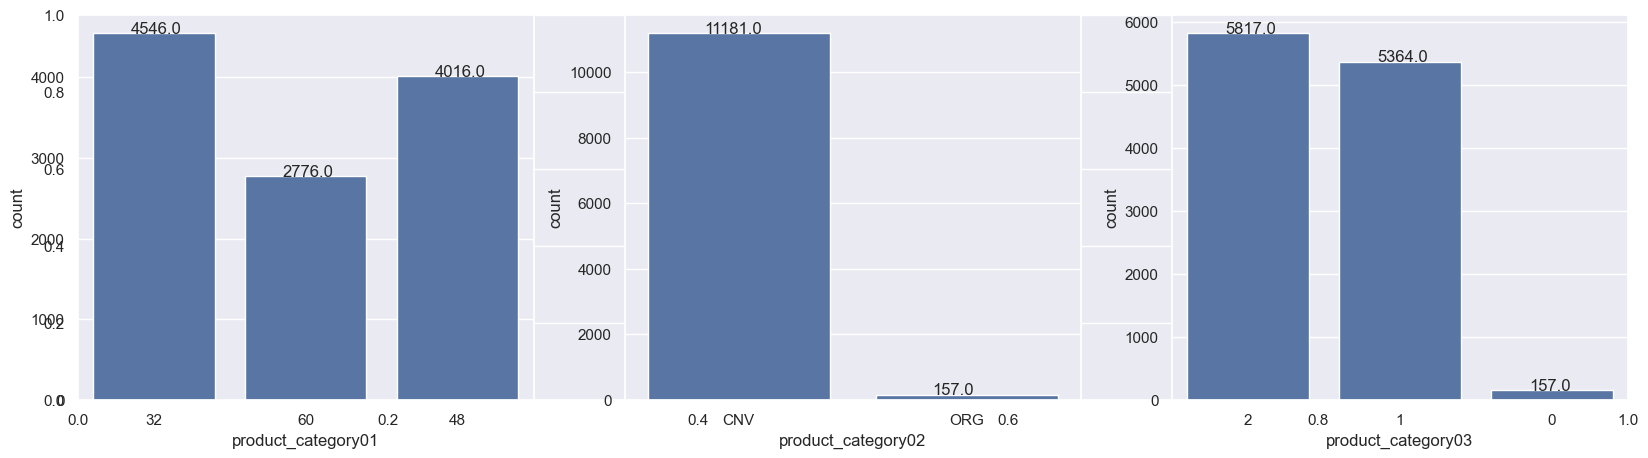

In [8]:
plt.subplots(figsize=(20,5))

plt.subplot(131)
ax=sns.countplot(data=df,x="product_category01")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(132)
ax=sns.countplot(data=df,x="product_category02")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(133)
ax=sns.countplot(data=df,x="product_category03")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

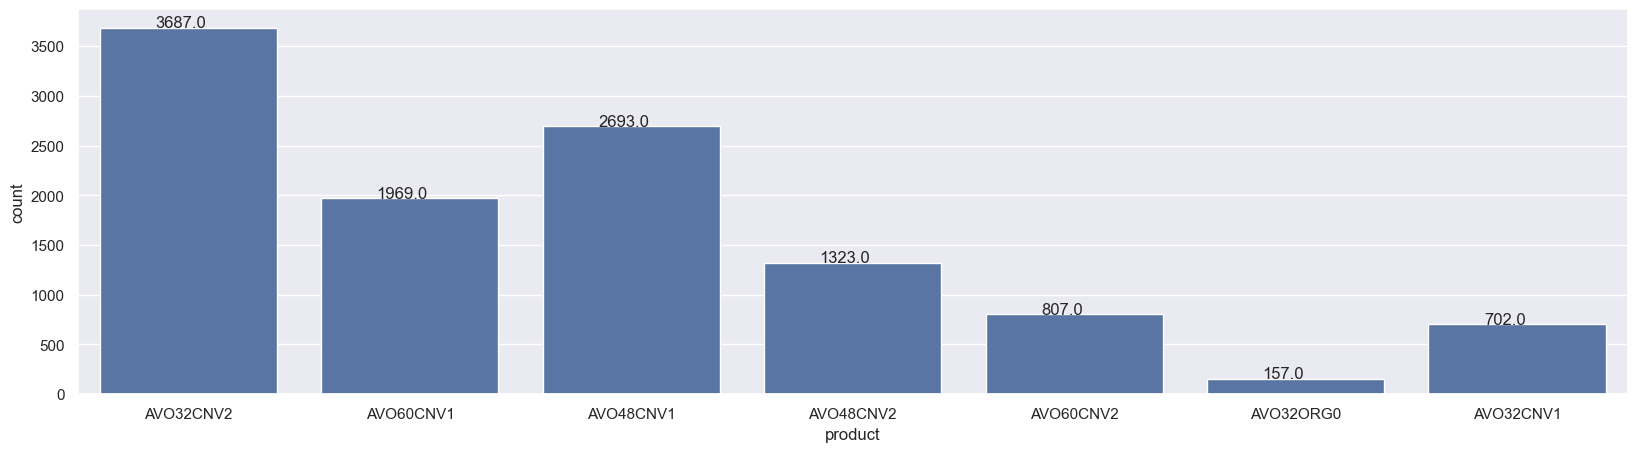

In [9]:
plt.subplots(figsize=(20,5))

ax=sns.countplot(data=df,x="product")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

---

#### *C. EDA Correlation*

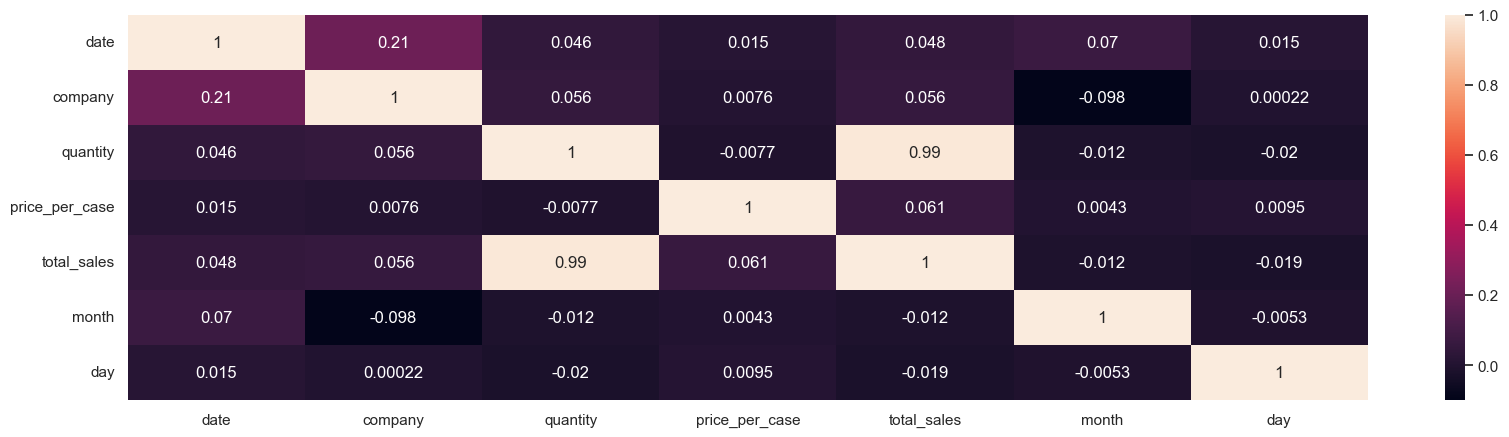

In [10]:
plt.subplots(figsize=(20,5))
sns.heatmap(numerical_features.corr(),annot=True);

---